# Mental Health in Tech Industry

## Preparations

First load the modules:

In [17]:
#!pip install seaborn --upgrade scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats


Then the data:

In [19]:
df0 = pd.read_csv('data/Answer.csv')
#df0.iloc[:,1:5]
df0
df_wide = pd.read_excel('data/Answer2.xlsx')
#print(df_wide['3'].unique())

Clean(er) data:

In [24]:
df_16_19 = (df_wide[df_wide['50'] == 'United States of America']
            [df_wide['SurveyID'] >= 2016]
            [(df_wide['1'] <= 67) & (df_wide['1'] >= 18)]
            [['UserID', 'SurveyID', '1', '2', '50',  '6', '33']].
            rename(columns = {'1': 'age', 
                              '2': 'gender', 
                              '50': 'country', 
                              '6': 'famHist',
                              '33': 'currMentDis'}))

df_16_19['gender'] = (df_16_19['gender'].
                      replace(['Female or Multi-Gender Femme', 
                                                 'Other', 
                                                 'none of your business', 
                                                 'genderqueer', 
                                                 'Human' ,
                                                 'Genderfluid', 
                                                 '-1',
                                                 'genderqueer woman',
                                                 'mtf',
                                                 'non-binary',
                                                 'Male/genderqueer',
                                                 'human',
                                                 'Nonbinary',
                                                 'Unicorn',
                                                 'Genderqueer',
                                                 'Genderflux demi-girl',
                                                 'AFAB',
                                                 'Agender',
                                                 'uhhhhhhhhh fem genderqueer?',
                                                 'God King of the Valajar',
                                                 'Non-binary',
                                                 'sometimes',
                                                 'Contextual',
                                                 'Non binary',
                                                 'Genderqueer demigirl',
                                                 'nonbinary',
                                                 'Female-ish',
                                                 'Transfeminine',
                                                 'None',
                                                 'Ostensibly Male',
                                                 'Trans man',
                                                 'transgender',
                                                 'non binary',
                                                 'Female/gender non-binary.',
                                                 'Trans woman',
                                                 'genderfluid',
                                                 'Demiguy',
                                                 'Trans female',
                                                 'She/her/they/them',
                                                 'SWM',
                                                 'NB',
                                                 'Nonbinary/femme',
                                                 'gender non-conforming woman',
                                                 'Cishet male', 
                                                 'agender', 
                                                 'Questioning', 
                                                 'I have a penis', 
                                                 'rr', 
                                                 'Agender trans woman',
                                                 'Trans non-binary/genderfluid',
                                                 'Non-binary and gender fluid', 'Fluid'], 'other').
                     replace(['Female', 'fm'], 'female').
                     replace('Male', 'male'))

df_16_19['currMentDis'] = (df_16_19['currMentDis'].
                           replace(['Maybe', 
                                    'Possibly', 
                                    "Don't Know"], 'maybe'))

df_16_19['SurveyID'] = (df_16_19['SurveyID'].astype('category'))


C:\Users\ns18v691\AppData\Local\Temp\ipykernel_23908\3302930781.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_16_19 = (df_wide[df_wide['50'] == 'United States of America']


View data

In [25]:
print(df_16_19['gender'].unique())
print(df_16_19['gender'].value_counts())

print(df_16_19['age'].unique())
print(df_16_19['age'].value_counts())

print(df_16_19['SurveyID'].unique())
print(df_16_19['SurveyID'].value_counts())

print(df_16_19['country'].unique())
print(df_16_19['country'].value_counts())

print(df_16_19['famHist'].unique())
print(df_16_19['famHist'].value_counts())

print(df_16_19['currMentDis'].unique())
print(df_16_19['currMentDis'].value_counts())

['male' 'female' 'other']
male      1203
female     592
other       72
Name: gender, dtype: int64
[29 43 30 37 44 28 34 35 52 25 31 26 38 40 41 33 32 45 27 36 46 24 23 39
 51 48 55 42 50 21 22 49 20 54 63 47 57 61 19 62 53 58 66 59 56 65 60 67]
30    126
32     95
35     94
28     93
31     90
37     90
29     89
34     88
33     79
36     74
27     74
26     72
39     70
38     67
40     61
42     55
25     55
24     49
45     41
41     40
44     39
23     33
43     32
22     30
47     26
46     25
49     22
50     16
48     15
55     15
51     14
21     14
52     13
53     11
54      9
57      8
56      7
63      5
61      5
19      5
20      5
59      4
58      3
60      2
62      2
66      2
67      2
65      1
Name: age, dtype: int64
[2016, 2017, 2018, 2019]
Categories (4, int64): [2016, 2017, 2018, 2019]
2016    847
2017    503
2018    314
2019    203
Name: SurveyID, dtype: int64
['United States of America']
United States of America    1867
Name: country, dtype: int64
['Yes' 'No'

In [26]:
df_16_19         

,UserID,SurveyID,age,gender,country,famHist,currMentDis
1261,1262,2016,29,male,United States of America,Yes,Yes
1264,1265,2016,43,female,United States of America,Yes,Yes
1266,1267,2016,30,male,United States of America,No,No
1267,1268,2016,37,female,United States of America,Yes,Yes
1268,1269,2016,44,female,United States of America,Yes,Yes
...,...,...,...,...,...,...,...
4209,4210,2019,27,male,United States of America,I don't know,Yes
4210,4211,2019,42,female,United States of America,Yes,Yes
4212,4213,2019,31,female,United States of America,No,No
4214,4215,2019,48,male,United States of America,No,No


## Change over the years

Data

In [27]:
df_chi2 = df_16_19[df_16_19['currMentDis'] != 'maybe'] #--> possibly

data_crosstab = pd.crosstab(df_chi2['SurveyID'],
                            df_chi2['currMentDis'])
data_crosstab

currMentDis,No,Yes
SurveyID,,
2016,270,396
2017,127,248
2018,74,162
2019,49,106


Chi-2 Test: significant

In [28]:
stats.chi2_contingency(data_crosstab)

(10.105337459241678,
 0.017691626984962888,
 3,
 array([[241.84357542, 424.15642458],
        [136.17318436, 238.82681564],
        [ 85.69832402, 150.30167598],
        [ 56.2849162 ,  98.7150838 ]]))

Post-hoc Tests (also Chi-2!): 2016 has relatively less People with mental illness

In [29]:
from itertools import combinations
all_combinations = list(combinations(data_crosstab.index, 2))
print("Significance results:")
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = data_crosstab[(data_crosstab.index == comb[0]) | (data_crosstab.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=False)
    print(f"Chi2 result for pair {comb}: {chi2}, p-value: {p}")

Significance results:
Chi2 result for pair (2016, 2017): 4.5293495880848855, p-value: 0.033318278453150586
Chi2 result for pair (2016, 2018): 6.230478628589807, p-value: 0.012556979133733867
Chi2 result for pair (2016, 2019): 4.218205773109184, p-value: 0.03999242865408616
Chi2 result for pair (2017, 2018): 0.4136243851707432, p-value: 0.520135619384696
Chi2 result for pair (2017, 2019): 0.2511536910935489, p-value: 0.6162638971277313
Chi2 result for pair (2018, 2019): 0.002865159858603458, p-value: 0.9573118687788436


In [30]:
all_combinations = list(combinations(data_crosstab.index, 2))
p_vals = []
for comb in all_combinations:
    # subset df into a dataframe containing only the pair "comb"
    new_df = data_crosstab[(data_crosstab.index == comb[0]) | (data_crosstab.index == comb[1])]
    # running chi2 test
    chi2, p, dof, ex = stats.chi2_contingency(new_df, correction=False)
    p_vals.append(p)
    
p_vals

[0.033318278453150586,
 0.012556979133733867,
 0.03999242865408616,
 0.520135619384696,
 0.6162638971277313,
 0.9573118687788436]

Correction for multiple Comparisons: Post-hoc tests not significant anymore

In [31]:
from statsmodels.sandbox.stats.multicomp import multipletests

multipletests(p_vals, method='h')[:2]

(array([False, False, False, False, False, False]),
 array([0.16659139, 0.07534187, 0.16659139, 1.        , 1.        ,
        1.        ]))

## Logistic Regression

Packages:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

Data: no "other" / "maybe" categories

In [33]:
df_logReg = (df_16_19[(df_16_19['currMentDis'] != 'maybe') & (df_16_19['gender'] != 'other') & (df_16_19['famHist'] != "I don't know")])


df_logReg = df_logReg.replace(['male', 'female', 'Yes', 'No'], [0, 1, 1, 0])
df_logReg

y_data = df_logReg['currMentDis']

x_data = df_logReg[['famHist', 'age', 'gender']]

Log Regression:
All predictors significant --> interpretation??

In [34]:
log_reg = sm.Logit(y_data, x_data).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.525085
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            currMentDis   No. Observations:                 1131
Model:                          Logit   Df Residuals:                     1128
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Oct 2022   Pseudo R-squ.:                  0.2089
Time:                        14:41:16   Log-Likelihood:                -593.87
converged:                       True   LL-Null:                       -750.67
Covariance Type:            nonrobust   LLR p-value:                 7.975e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
famHist        2.2040      0.144     15.297      0.000       1.922       2.486
age           -0.0284      0.

In [39]:
import math
print(math.exp(2.2040))
print(math.exp(-0.0284))
print(math.exp(0.4706))


9.061185849903008
0.9719994892352246
1.600954477789854


In [41]:
f2 = 0.2089 / (1-0.2089)
f2

0.2640626975097965

Alle 3 Prädiktoren signifikant
Interpretation?

Multicollinearity (correlations)

In [37]:
df_logReg.corr()

,UserID,age,gender,famHist,currMentDis
UserID,1.000000,0.060312,0.056832,0.056019,0.064570
age,0.060312,1.000000,-0.038227,-0.082470,-0.054854
gender,0.056832,-0.038227,1.000000,0.197326,0.188383
famHist,0.056019,-0.082470,0.197326,1.000000,0.521609
currMentDis,0.064570,-0.054854,0.188383,0.521609,1.000000


Linearity test for age

In [38]:
df_logReg['age:log_age'] = df_logReg['age'].apply(lambda x: x * np.log(x))
print(df_logReg)

      UserID SurveyID  age  gender                   country  famHist  \
1261    1262     2016   29       0  United States of America        1   
1264    1265     2016   43       1  United States of America        1   
1266    1267     2016   30       0  United States of America        0   
1267    1268     2016   37       1  United States of America        1   
1268    1269     2016   44       1  United States of America        1   
...      ...      ...  ...     ...                       ...      ...   
4202    4203     2019   55       0  United States of America        1   
4210    4211     2019   42       1  United States of America        1   
4212    4213     2019   31       1  United States of America        0   
4214    4215     2019   48       0  United States of America        0   
4217    4218     2019   24       1  United States of America        1   

      currMentDis  age:log_age  
1261            1    97.651579  
1264            1   161.731605  
1266            0   102.

In [21]:
y_lt = df_logReg['currMentDis']
x_lt = df_logReg[['age', 'age:log_age']]

log_reg_lt = sm.Logit(y_lt, x_lt).fit()
print(log_reg_lt.summary())

Optimization terminated successfully.
         Current function value: 0.661346
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            currMentDis   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1117
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                0.003289
Time:                        10:53:18   Log-Likelihood:                -740.05
converged:                       True   LL-Null:                       -742.49
Covariance Type:            nonrobust   LLR p-value:                   0.02711
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.1155      0.025      4.536      0.000       0.066       0.165
age:log_age    -0.0282    

## test plots

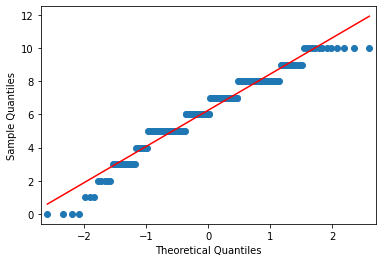

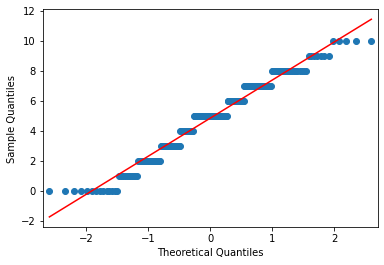

In [10]:
import statsmodels.api as sm
fig=sm.qqplot(df_2019['impPhyHealth'], line='s' )
sm.qqplot(df_2019['impMentHealth'], line='s')
plt.show()

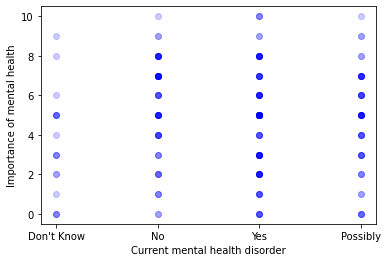

In [11]:
plt.subplot(1,1,1)
plt.scatter(df_2019['currMentDis'],df_2019['impMentHealth'],c='b', alpha = 1/5)
#plt.scatter(df_ref_vir['plength'],df_ref_vir['pwidth'],c='g',label='Virginica')
#plt.scatter(df_ref_ver['plength'],df_ref_ver['pwidth'],c='r',label='Versicolor')
#plt.scatter(df_farm['plength'],df_farm['pwidth'],c='purple',label='Farmer')
plt.xlabel('Current mental health disorder')
plt.ylabel('Importance of mental health')
#plt.legend()
plt.show()